## AUTHOR : G.R.VAISSHALLI

#### ANALYSIS OF METEROLOGICAL DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load dataset

df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [5]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [15]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc=True)
df = df.set_index("Formatted Date")
data = df[['Apparent Temperature (C)','Humidity']].resample('MS').mean()
data

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
...,...,...
2016-08-01 00:00:00+00:00,21.383094,0.674046
2016-09-01 00:00:00+00:00,18.355833,0.688833
2016-10-01 00:00:00+00:00,8.923947,0.799906


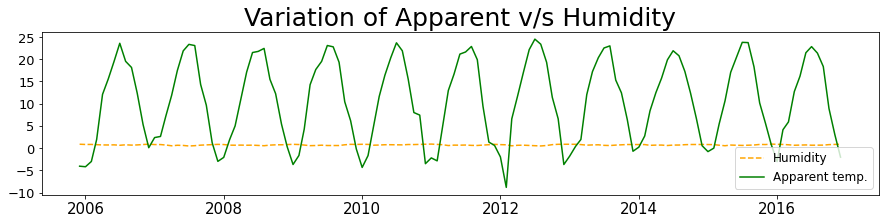

In [17]:
plt.figure(figsize=(15,3));
plt.plot(data['Humidity'], label = 'Humidity', color = 'orange',linestyle='dashed');
plt.plot(data['Apparent Temperature (C)'],label = 'Apparent temp.',color='green');
plt.title('Variation of Apparent v/s Humidity',fontsize=25);
plt.legend(loc=0,fontsize=12);
plt.xticks(fontsize = 15);
plt.yticks(fontsize=13);

#####                                                                                 GRAPH FOR ALL MONTHS

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

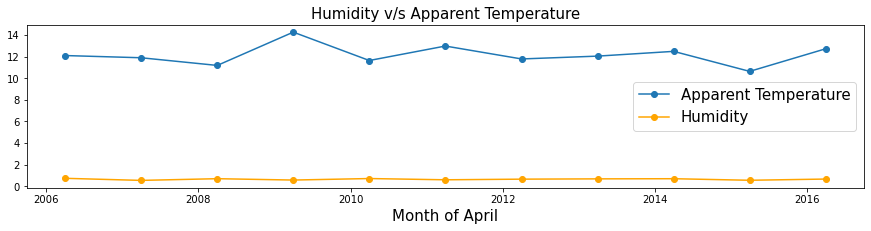

In [19]:
april = data[data.index.month==4]
plt.figure(figsize=(15,3));
plt.plot(april.loc['2006-04-01':'2016-04-01','Apparent Temperature (C)'], marker='o',linestyle='-',label='Apparent Temperature');
plt.plot(april.loc['2006-04-01':'2016-04-01','Humidity'],marker='o',linestyle='-',label='Humidity',color='orange');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('Month of April',fontsize=15);
plt.title('Humidity v/s Apparent Temperature',fontsize=15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '10.632800925925924'),
  Text(1, 0, '11.183688271604934'),
  Text(2, 0, '11.639405864197537'),
  Text(3, 0, '11.782770061728392'),
  Text(4, 0, '11.894421296296294'),
  Text(5, 0, '12.045563271604935'),
  Text(6, 0, '12.09882716049382'),
  Text(7, 0, '12.486180555555539'),
  Text(8, 0, '12.731427469135806'),
  Text(9, 0, '12.978996913580254'),
  Text(10, 0, '14.267075617283941')])

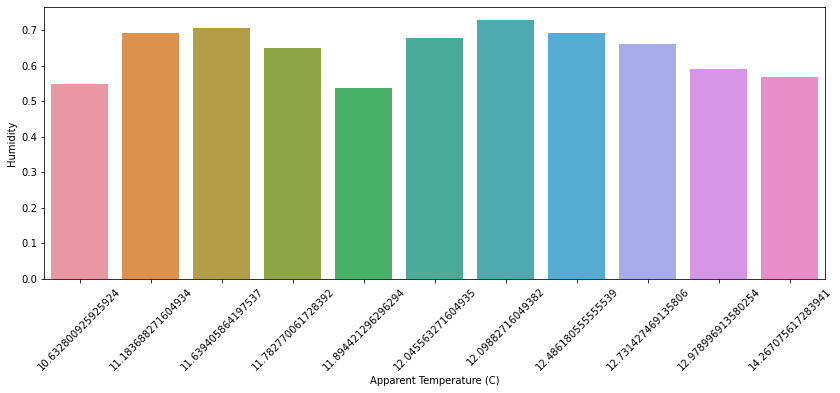

In [20]:
plt.figure(figsize=(14,5))
sns.barplot(x='Apparent Temperature (C)',y='Humidity',data=april)
plt.xticks(rotation=45)

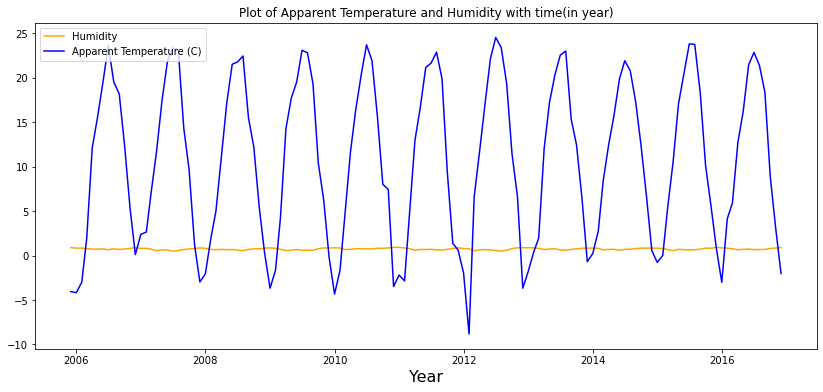

In [21]:
plt.figure(figsize=(14,6))
plt.title("Plot of Apparent Temperature and Humidity with time(in year)")
plt.plot(data['Humidity'],label='Humidity',color='orange')
plt.plot(data['Apparent Temperature (C)'],label='Apparent Temperature (C)', color='blue')
plt.xlabel("Year",fontsize="16")
plt.legend(loc=2,fontsize=10)

In [23]:
jan=data[data.index.month==1]
feb=data[data.index.month==2]
mar=data[data.index.month==3]
apr=data[data.index.month==4]
may=data[data.index.month==5]
jun=data[data.index.month==6]
jul=data[data.index.month==7]
aug=data[data.index.month==8]
sep=data[data.index.month==9]
octo=data[data.index.month==10]
nov=data[data.index.month==11]
dec=data[data.index.month==12]

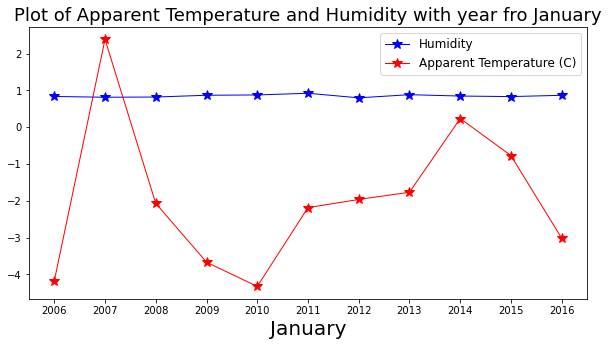

In [26]:
plt.figure(figsize=(10,5))
plt.title("Plot of Apparent Temperature and Humidity with year fro January",fontsize=18)
plt.plot(jan['Humidity'],label='Humidity',color='blue',marker='*',linewidth=1,markersize=10)
plt.plot(jan['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='red',marker='*',linewidth=1,markersize=10)
plt.xlabel('January',fontsize=20)
plt.legend(loc=1,fontsize=12)

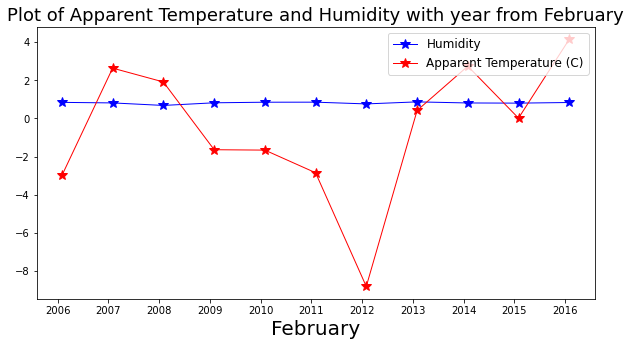

In [28]:
plt.figure(figsize=(10,5))
plt.title("Plot of Apparent Temperature and Humidity with year from February",fontsize=18)
plt.plot(feb['Humidity'],label='Humidity',color='blue',marker='*',linewidth=1,markersize=10)
plt.plot(feb['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='red',marker='*',linewidth=1,markersize=10)
plt.xlabel('February',fontsize=20)
plt.legend(loc=1,fontsize=12)

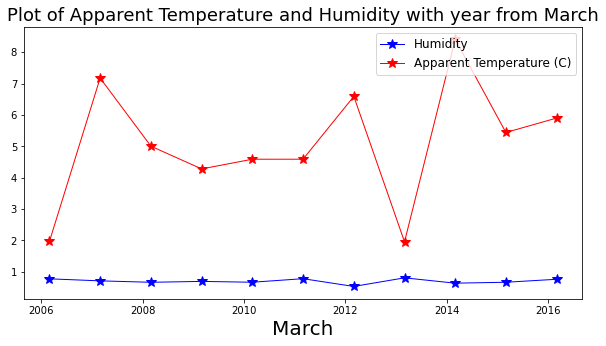

In [29]:
plt.figure(figsize=(10,5))
plt.title("Plot of Apparent Temperature and Humidity with year from March",fontsize=18)
plt.plot(mar['Humidity'],label='Humidity',color='blue',marker='*',linewidth=1,markersize=10)
plt.plot(mar['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='red',marker='*',linewidth=1,markersize=10)
plt.xlabel('March',fontsize=20)
plt.legend(loc=1,fontsize=12)

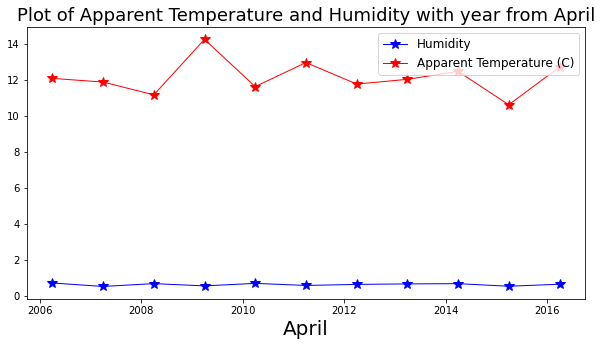

In [30]:
plt.figure(figsize=(10,5))
plt.title("Plot of Apparent Temperature and Humidity with year from April",fontsize=18)
plt.plot(apr['Humidity'],label='Humidity',color='blue',marker='*',linewidth=1,markersize=10)
plt.plot(apr['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='red',marker='*',linewidth=1,markersize=10)
plt.xlabel('April',fontsize=20)
plt.legend(loc=1,fontsize=12)

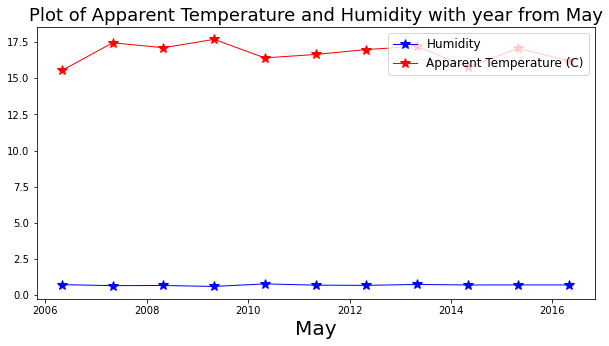

In [31]:
plt.figure(figsize=(10,5))
plt.title("Plot of Apparent Temperature and Humidity with year from May",fontsize=18)
plt.plot(may['Humidity'],label='Humidity',color='blue',marker='*',linewidth=1,markersize=10)
plt.plot(may['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='red',marker='*',linewidth=1,markersize=10)
plt.xlabel('May',fontsize=20)
plt.legend(loc=1,fontsize=12)

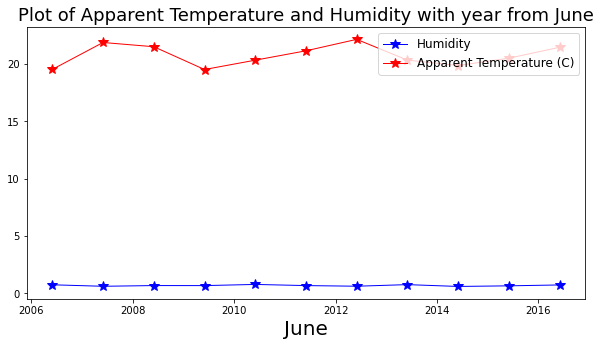

In [32]:
plt.figure(figsize=(10,5))
plt.title("Plot of Apparent Temperature and Humidity with year from June",fontsize=18)
plt.plot(jun['Humidity'],label='Humidity',color='blue',marker='*',linewidth=1,markersize=10)
plt.plot(jun['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='red',marker='*',linewidth=1,markersize=10)
plt.xlabel('June',fontsize=20)
plt.legend(loc=1,fontsize=12)

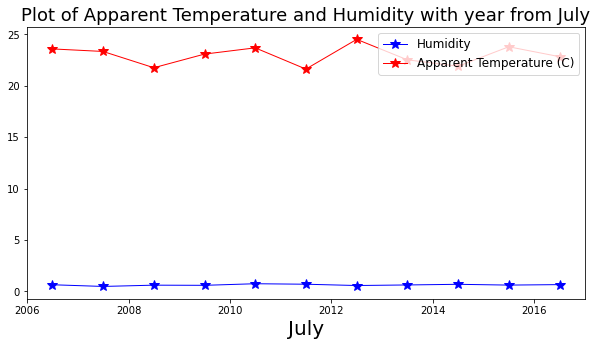

In [33]:
plt.figure(figsize=(10,5))
plt.title("Plot of Apparent Temperature and Humidity with year from July",fontsize=18)
plt.plot(jul['Humidity'],label='Humidity',color='blue',marker='*',linewidth=1,markersize=10)
plt.plot(jul['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='red',marker='*',linewidth=1,markersize=10)
plt.xlabel('July',fontsize=20)
plt.legend(loc=1,fontsize=12)

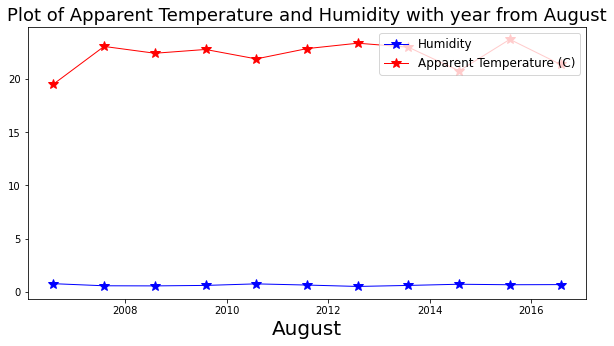

In [34]:
plt.figure(figsize=(10,5))
plt.title("Plot of Apparent Temperature and Humidity with year from August",fontsize=18)
plt.plot(aug['Humidity'],label='Humidity',color='blue',marker='*',linewidth=1,markersize=10)
plt.plot(aug['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='red',marker='*',linewidth=1,markersize=10)
plt.xlabel('August',fontsize=20)
plt.legend(loc=1,fontsize=12)

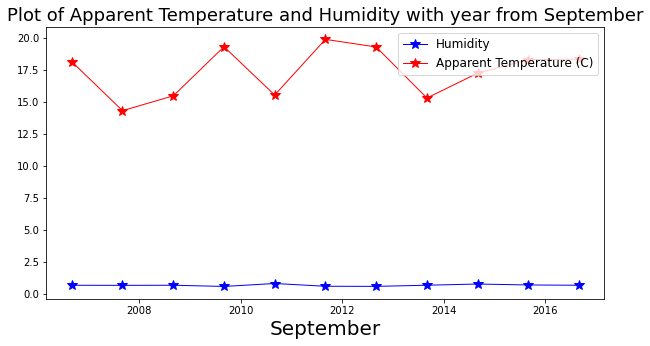

In [35]:
plt.figure(figsize=(10,5))
plt.title("Plot of Apparent Temperature and Humidity with year from September",fontsize=18)
plt.plot(sep['Humidity'],label='Humidity',color='blue',marker='*',linewidth=1,markersize=10)
plt.plot(sep['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='red',marker='*',linewidth=1,markersize=10)
plt.xlabel('September',fontsize=20)
plt.legend(loc=1,fontsize=12)

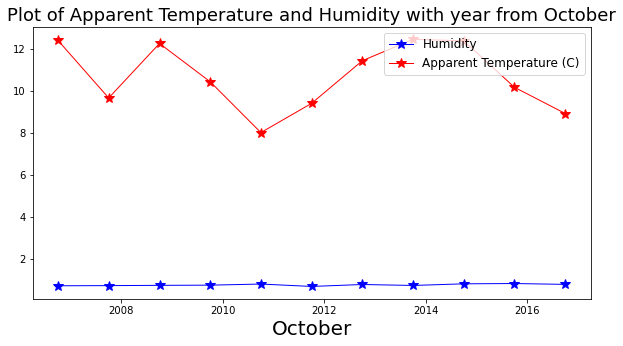

In [36]:
plt.figure(figsize=(10,5))
plt.title("Plot of Apparent Temperature and Humidity with year from October",fontsize=18)
plt.plot(octo['Humidity'],label='Humidity',color='blue',marker='*',linewidth=1,markersize=10)
plt.plot(octo['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='red',marker='*',linewidth=1,markersize=10)
plt.xlabel('October',fontsize=20)
plt.legend(loc=1,fontsize=12)

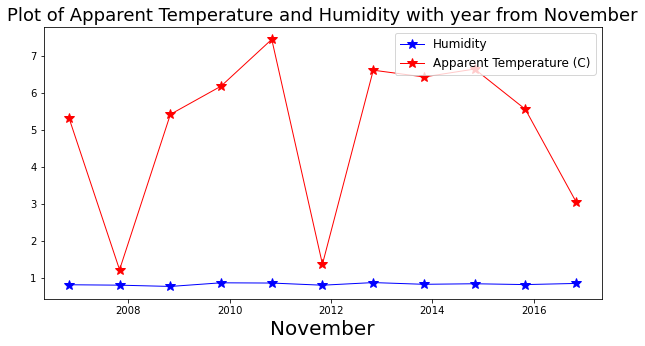

In [37]:
plt.figure(figsize=(10,5))
plt.title("Plot of Apparent Temperature and Humidity with year from November",fontsize=18)
plt.plot(nov['Humidity'],label='Humidity',color='blue',marker='*',linewidth=1,markersize=10)
plt.plot(nov['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='red',marker='*',linewidth=1,markersize=10)
plt.xlabel('November',fontsize=20)
plt.legend(loc=1,fontsize=12)

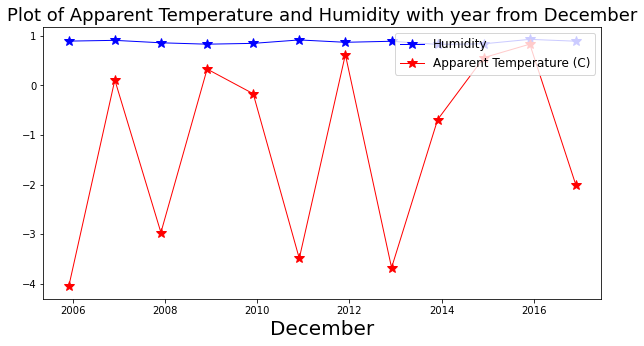

In [38]:
plt.figure(figsize=(10,5))
plt.title("Plot of Apparent Temperature and Humidity with year from December",fontsize=18)
plt.plot(dec['Humidity'],label='Humidity',color='blue',marker='*',linewidth=1,markersize=10)
plt.plot(dec['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='red',marker='*',linewidth=1,markersize=10)
plt.xlabel('December',fontsize=20)
plt.legend(loc=1,fontsize=12)

C:\Users\mdgop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Humidity', ylabel='Density'>

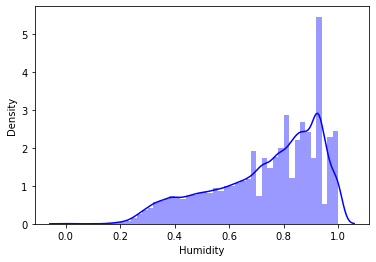

In [39]:
sns.distplot(df.Humidity,color='blue')

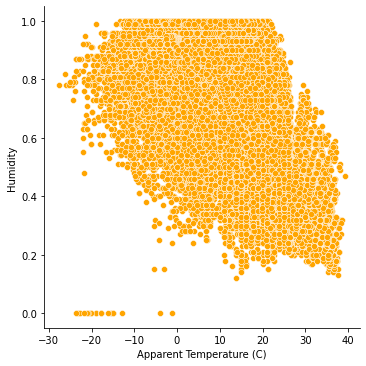

In [42]:
sns.relplot(data=df,x='Apparent Temperature (C)',y='Humidity',color='orange')